<a href="https://colab.research.google.com/github/LiemHuynh0311/Homework2_W2/blob/main/homework2_w2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135
              AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

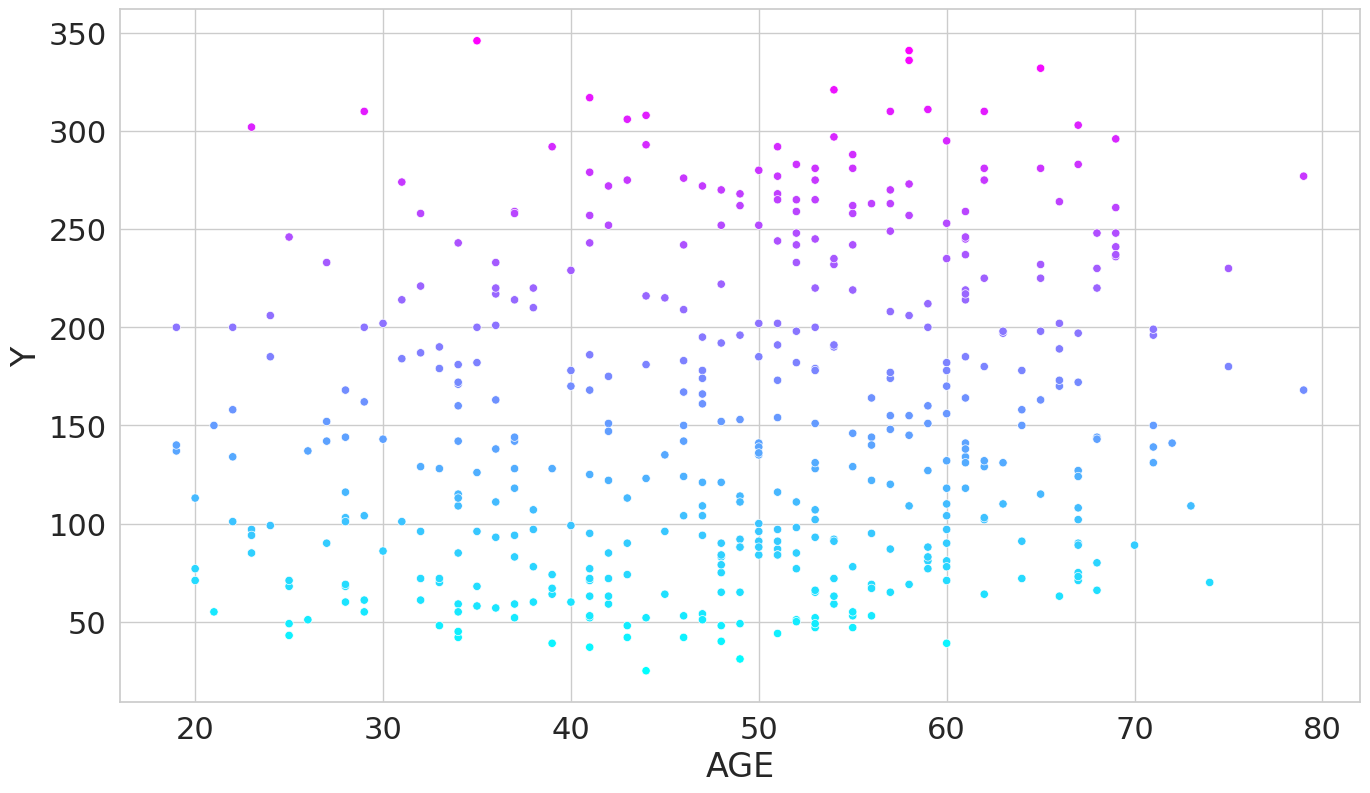

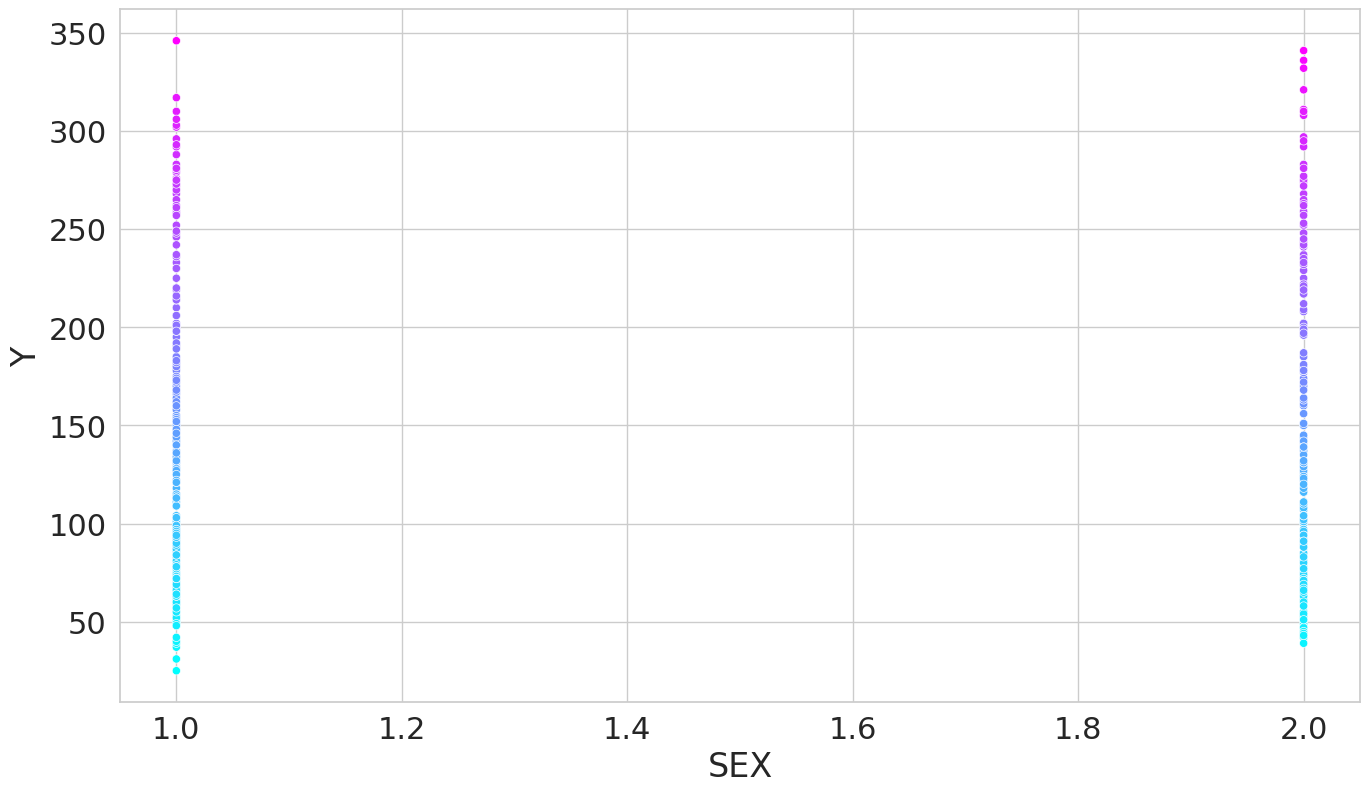

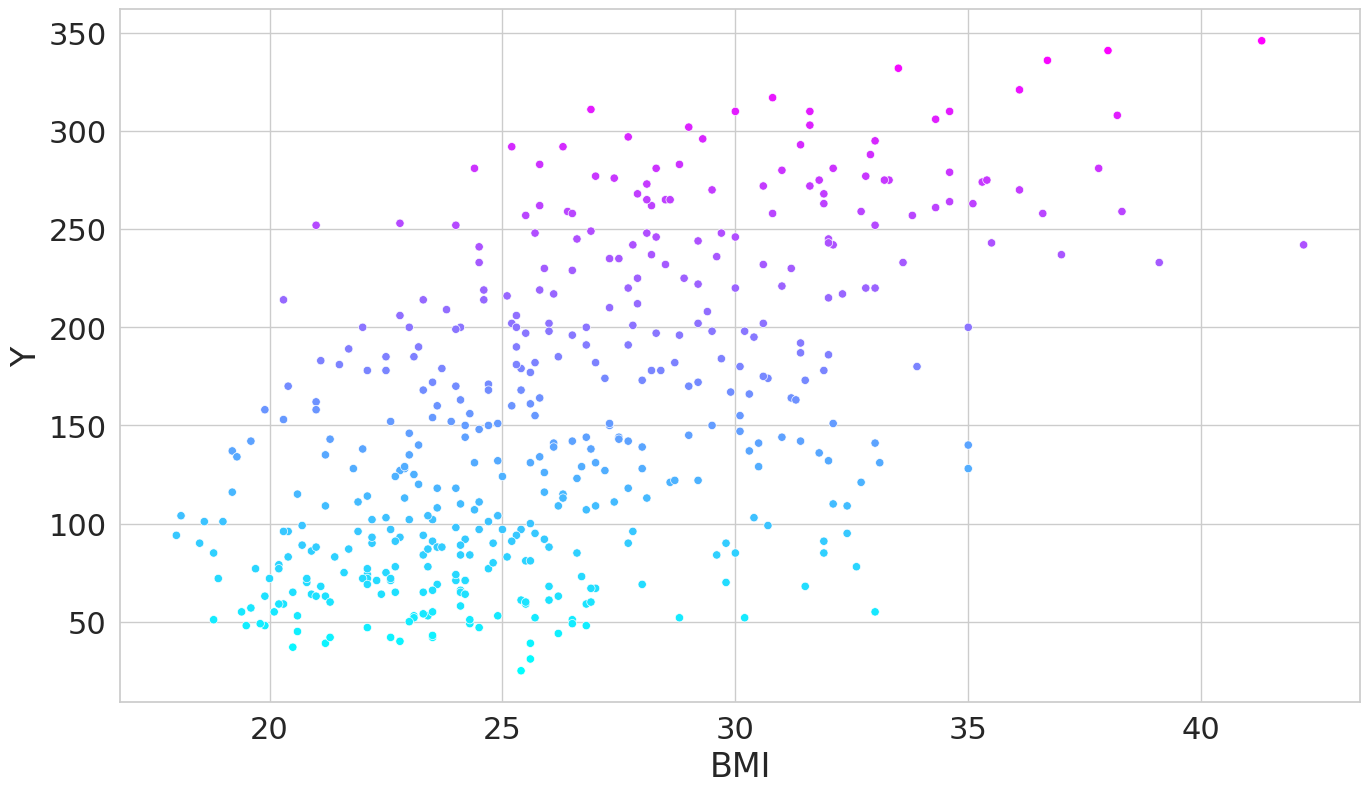

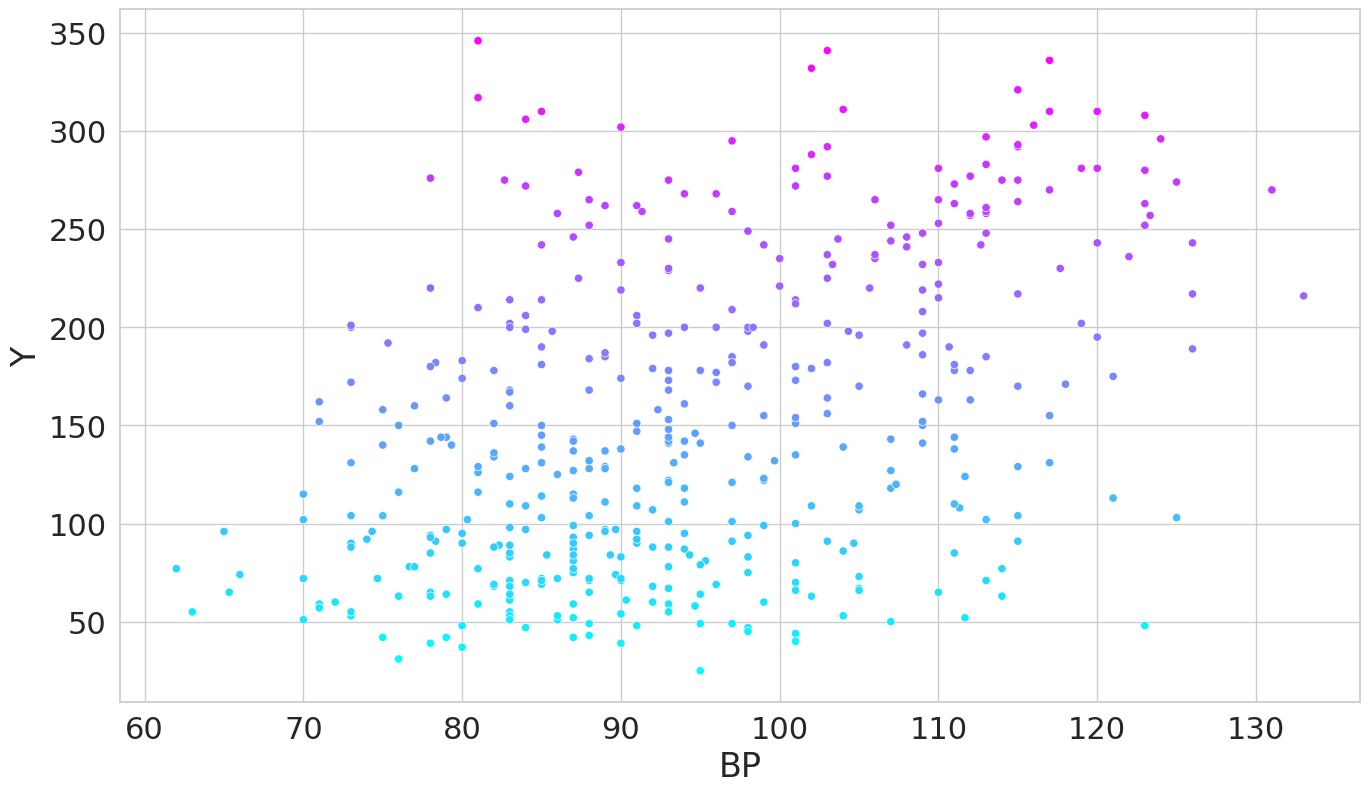

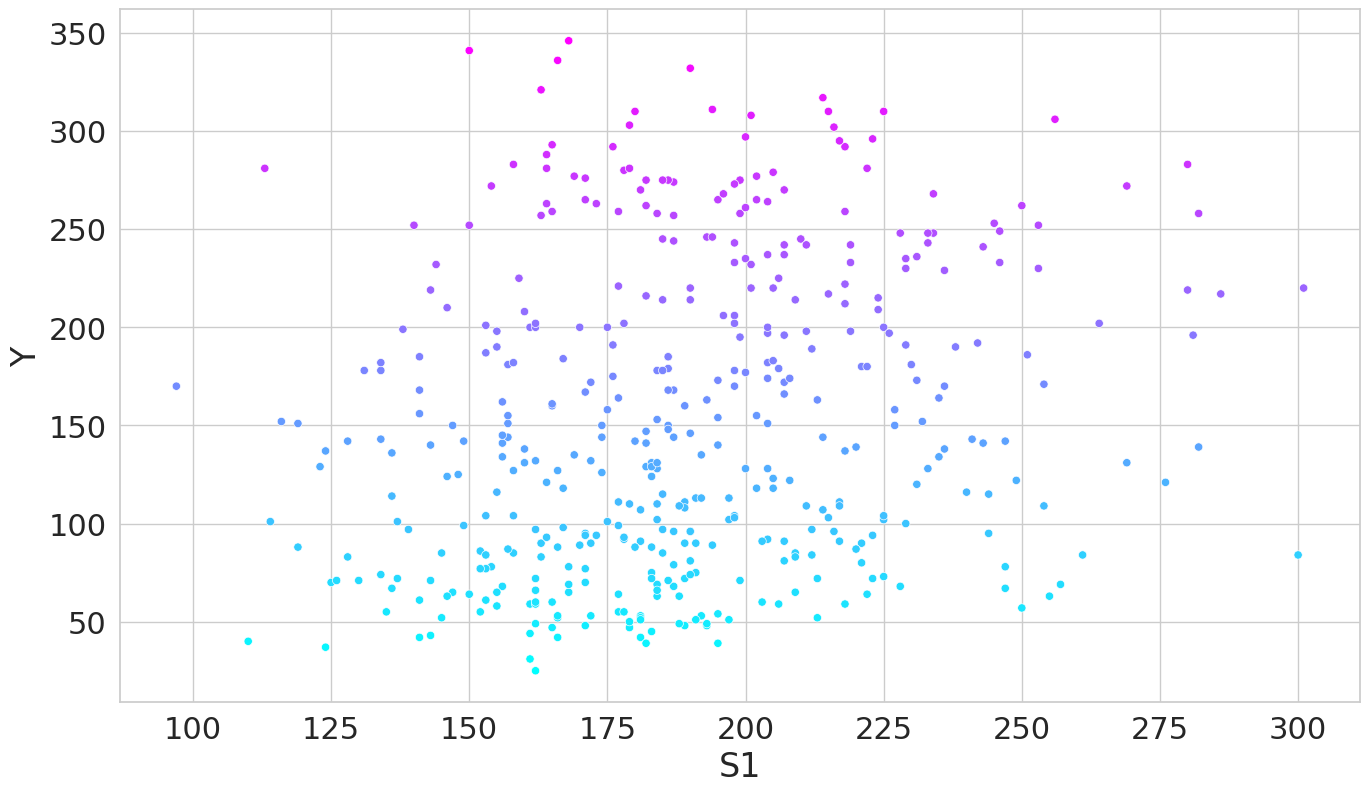

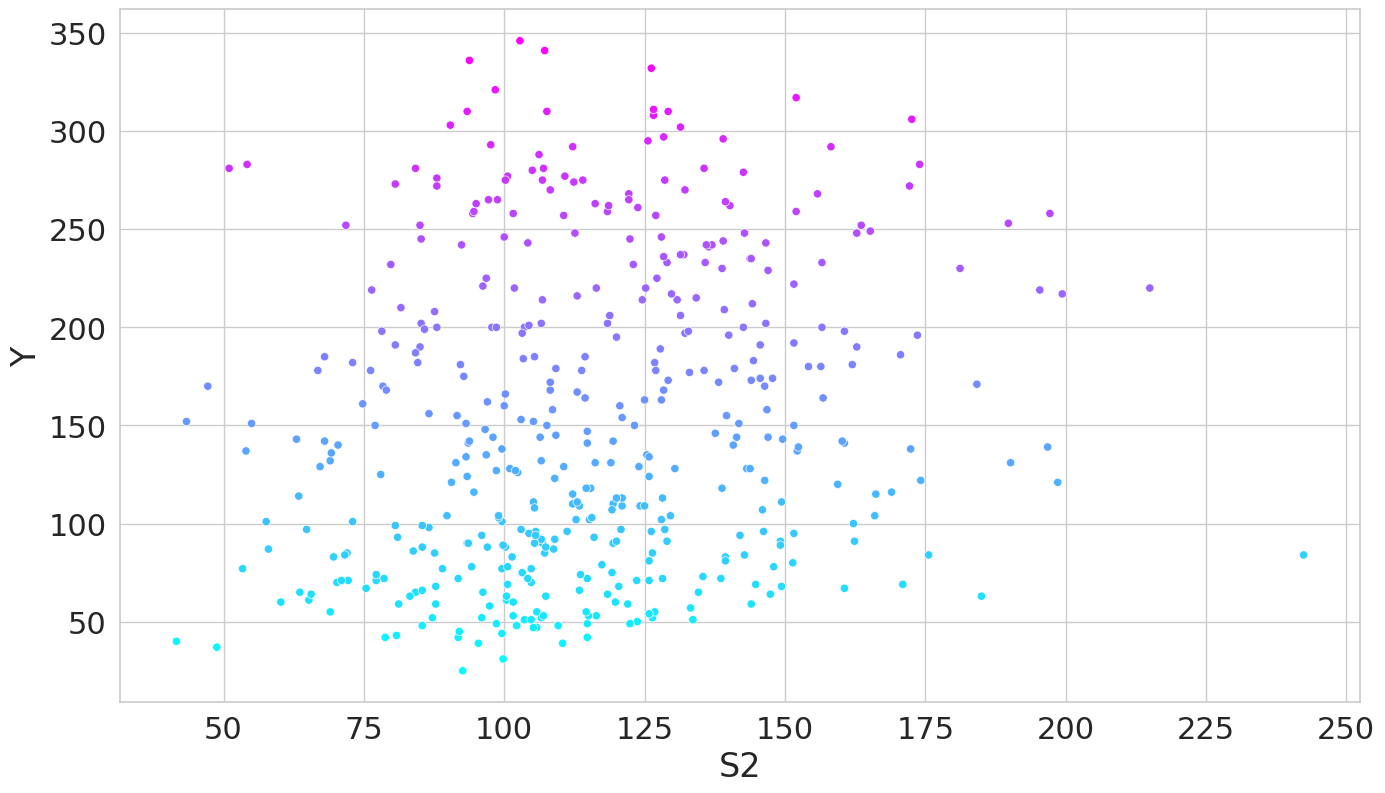

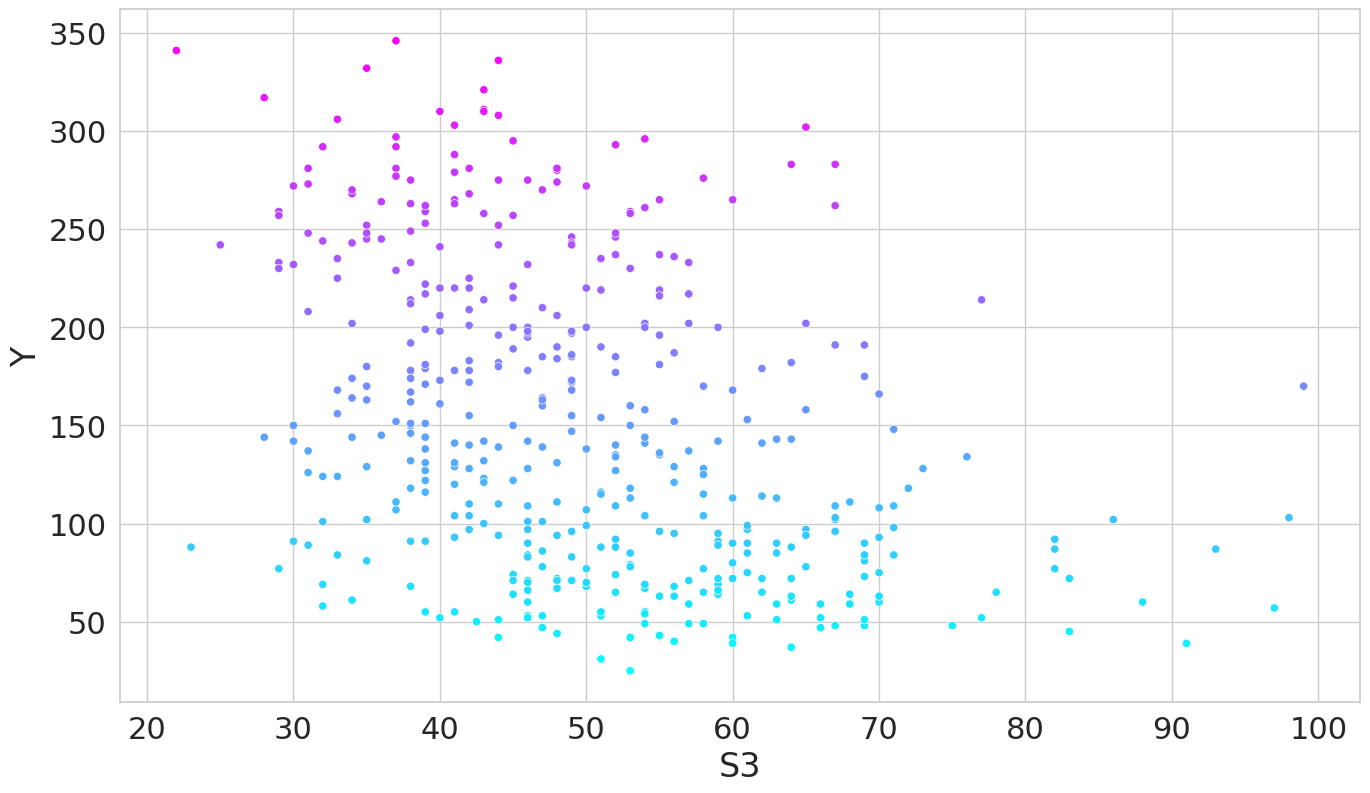

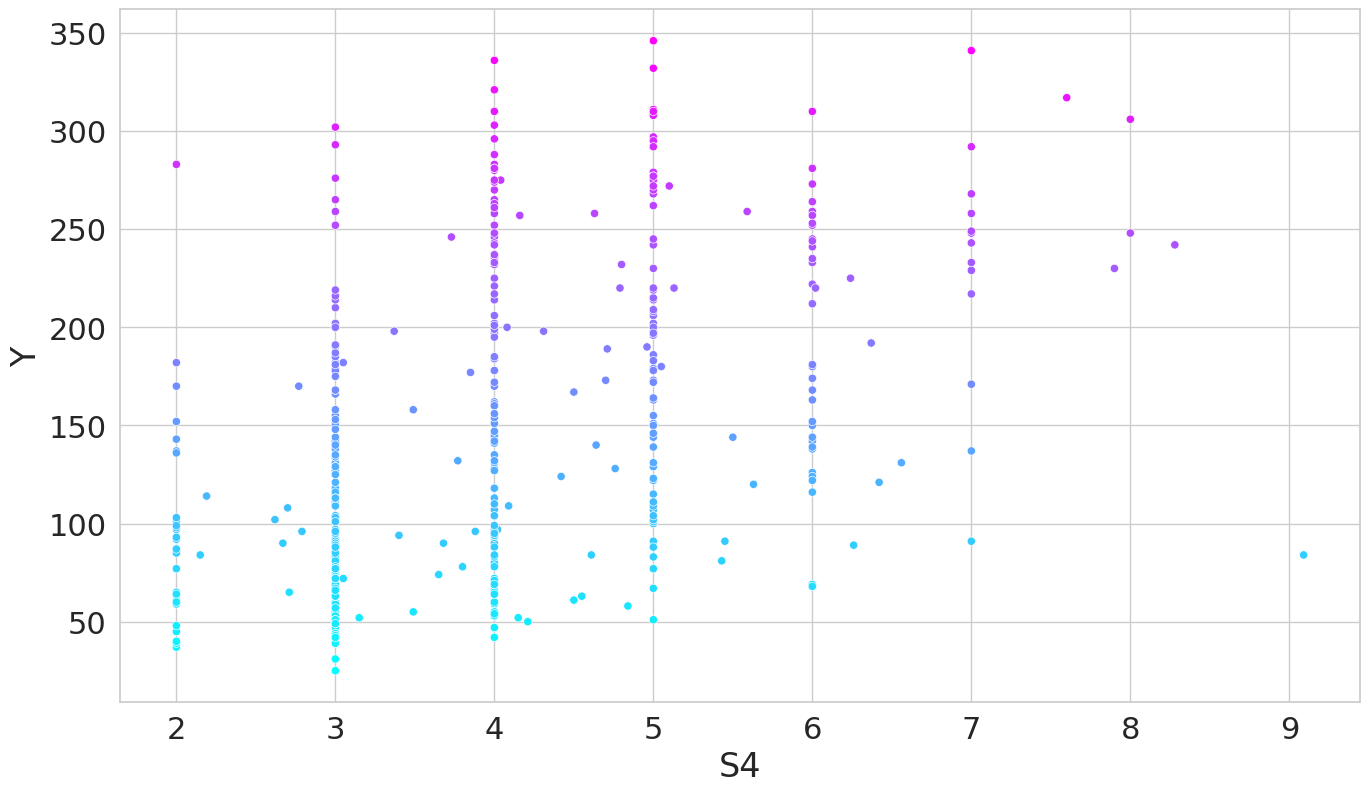

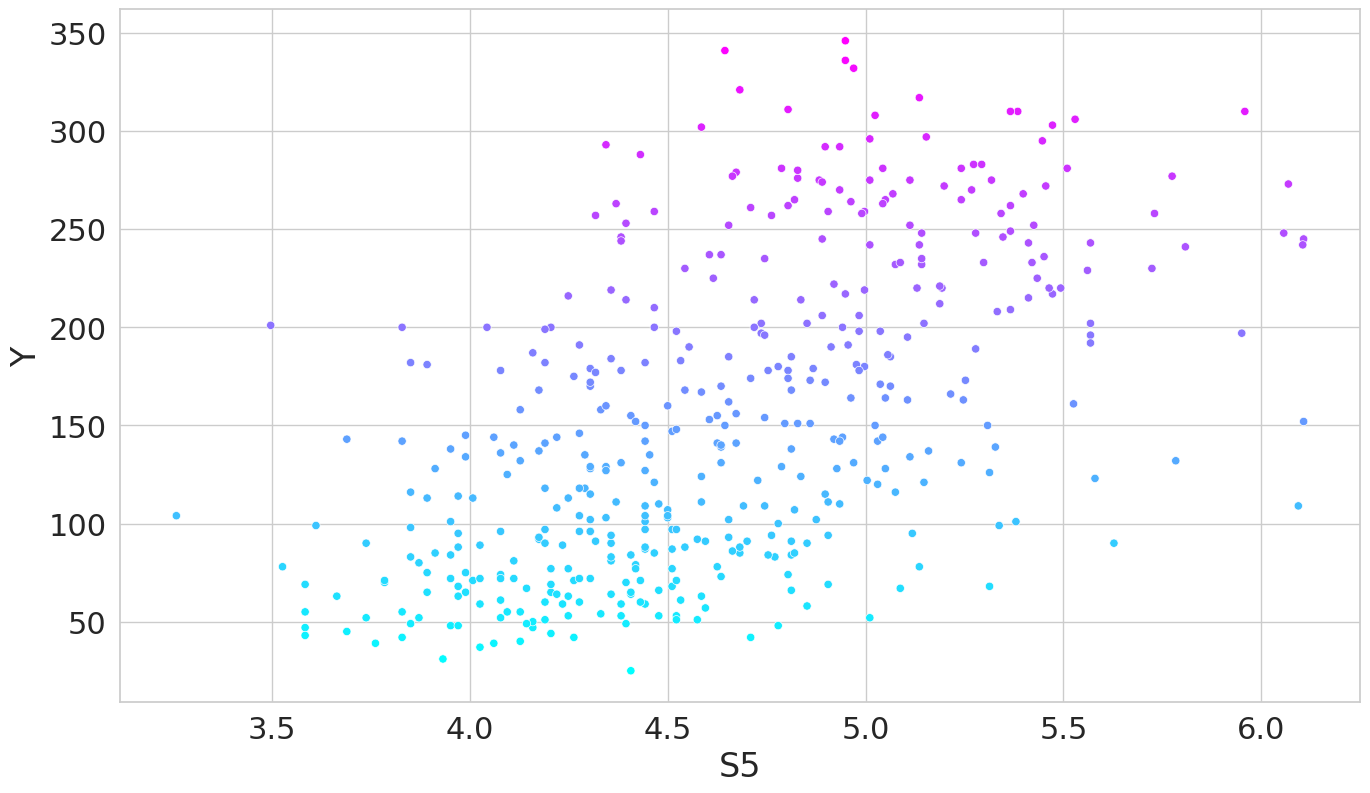

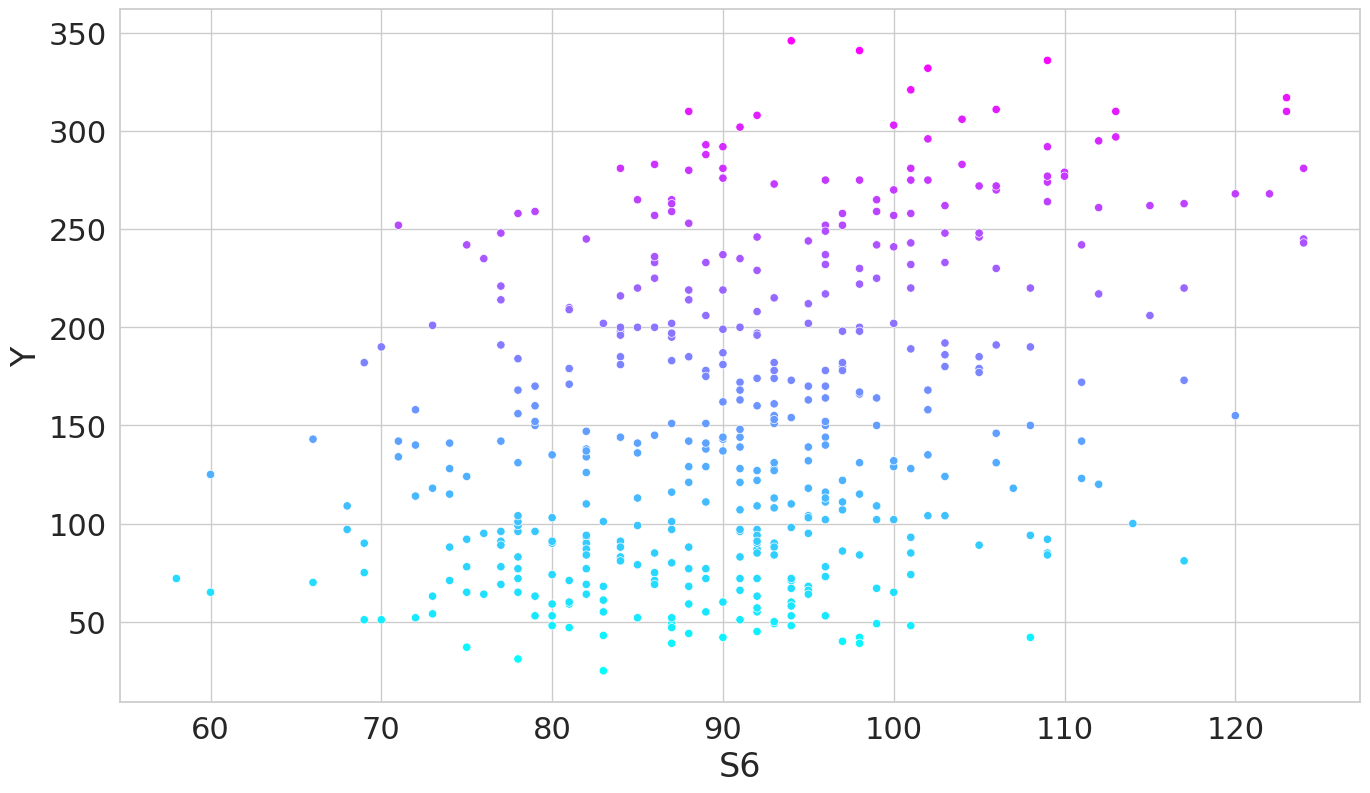

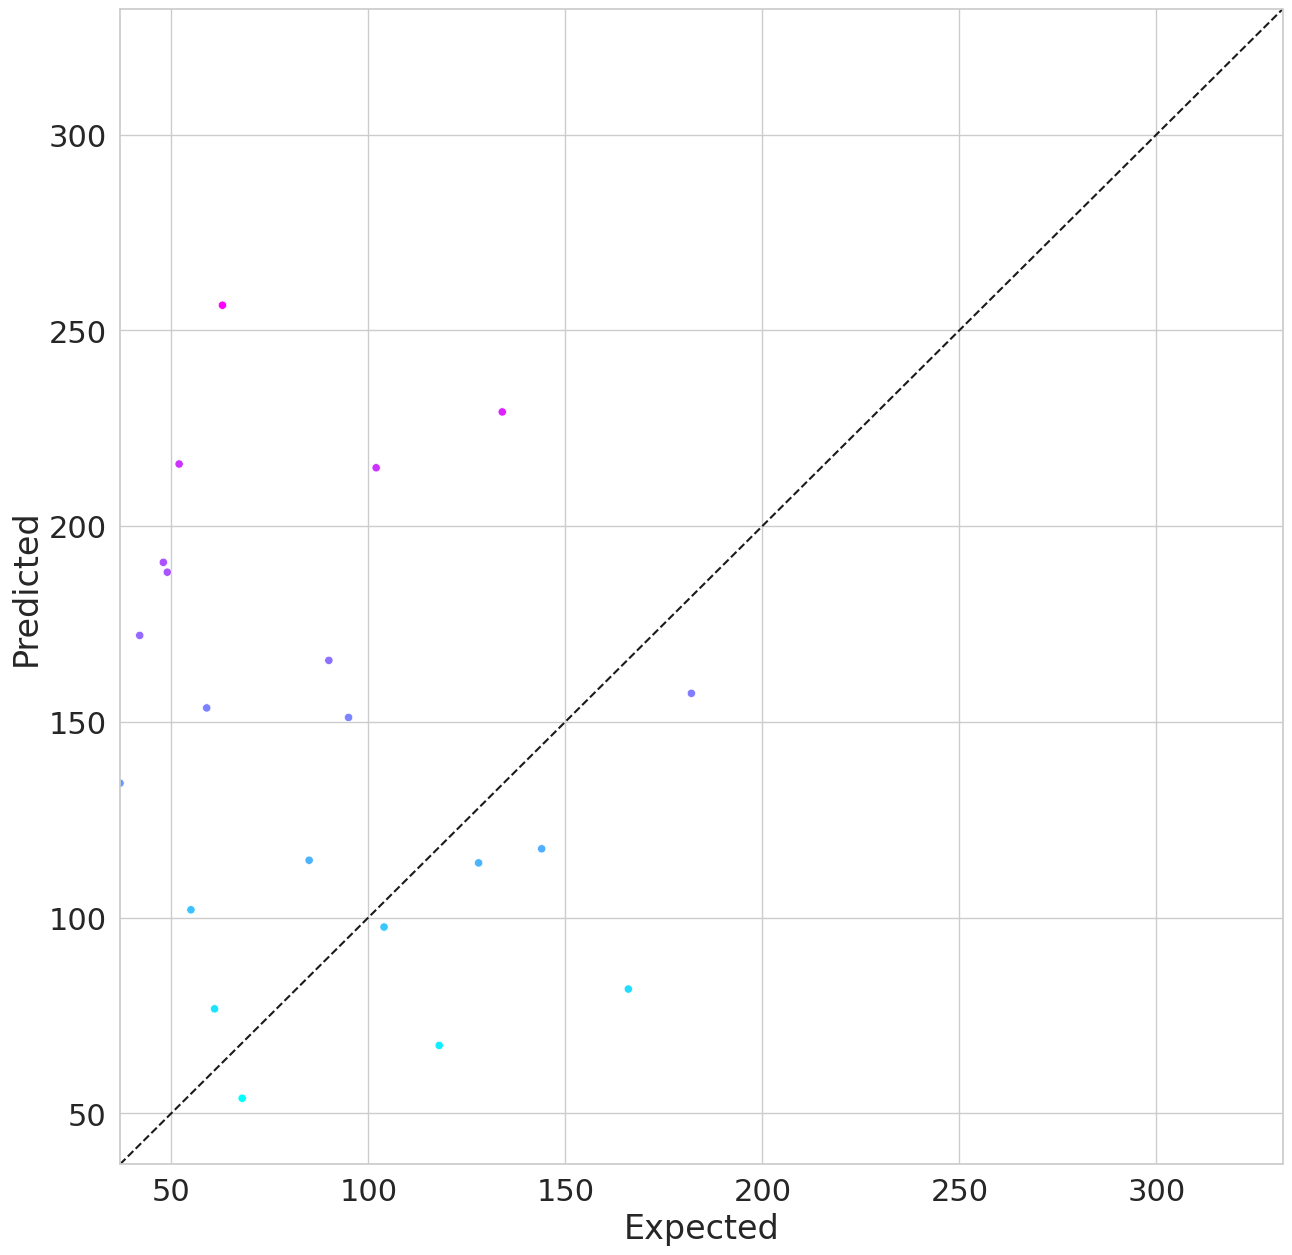

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
diabetes_dataframe = pd.read_table(url, sep='\t')
print(diabetes_dataframe.head())
print(diabetes_dataframe.describe())
sns.set(font_scale=2)
sns.set_style('whitegrid')
for feature in diabetes_dataframe.columns[:-1]:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=diabetes_dataframe, x=feature, y='Y', hue='Y', palette='cool', legend=False)
X_train, X_test, y_train, y_test = train_test_split(diabetes_dataframe.iloc[:, :-1], diabetes_dataframe['Y'], random_state=11)
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)
predicted = linear_regression.predict(X_test)
expected = y_test
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)
figure = plt.figure(figsize=(15, 15))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
print(axes.set_xlim(start, end))
print(axes.set_ylim(start, end))
line = plt.plot([start, end], [start, end], 'k--')
print(metrics.r2_score(expected, predicted))
print(metrics.mean_squared_error(expected, predicted))
diabetes_dataframe.columns